# Markov decision process II

### Outline of lecture

<code>**1. Markov processes**</code><br>

<code>**2. Markov reward processes**</code><br>

<code>**3. Markov decision processes**</code><br>

<code>**4. Extensions to MDP's**</code><br>


We will be layering more complexity but start with basic idea which is <code>**Markov processes**</code> or <code>**Markov chain**</code>. And later on we will go into perhaps less familiar ideas which are essential to reinforcement learning  first of all adding rewards in to have <code>**Markov reward process**</code> and then by adding actions in to have <code>**Markov deicsion processes**</code> and finally there are extensions to <code>**MDP's**</code> where we can move on beyong these three settings by adding even more complexity about partial observability and so on.

### Introduction to MDP's

 - Markov decision processes formally descibe an environment for reinforcement learning 

What we try to cover here if you remember from previous lecture we talked about agents and environmnets. We have our agent and thats our algorithm that interacting with some world. It might be a real world for a robot it might be a trading environmnet for trading agent and so forth. And we want some desciption of this environment that we could understand it and apply so tools to it and really understand what it means to reinforcement learning in that setting. Thats <code>**MDP**</code>.

 -  the <code>**environmnet is fully observable**</code>

Starting with a nice case where. We are told it's state, we see everything what there is to know about that environmnet all the relevant information is presented to our agent. Nothing is hidden away. 

  - The current state completely charachterises the process

The way how the environmnet unfolds. Depends on some state and we are told that state, we know that state. Its fully observed. 

 - Almost all RL problems can be formalised as MDPs, e.g

The nice thing about this formalism is that all RL problems can be formalized as MDPs. Even the less familiar cases :
 - Optimal control primarly deals wit continous MDPs with continious actions(differential dynamics describing some fluids)
 - Partially observable problems can be convertend into MDPs. 
 - Bandits are MDPs wiht one state. (Exploitation vs exploration dilema)

The central idea to MDP. We have seen this in previous lecture content which is <code>**Markov property**</code>:

<code>**The future is independant of the past given the present**</code>

<div class="alert alert-block alert-info">
<h2>Definition</h2>
    
<code>**All state S 𝑡 is Markov IF AND ONLY IF**</code>
    
\begin{multline*}
\mathbb{P}[S_{t+1} | S_{t}] = \mathbb{P}[S_{t+1} | S_{1}, ..., S_{t}]
\end{multline*}
    
</div>

 - The state capture all relevant information form the history
 - Once the state is known, the history may be thronw away
 - The state is a sufficinet statistics of the future 

We have some state this random variable <S𝑡> that characterizes where we are in the our environment. And if it has a Markov property then this basically tells us that the future is independent of the past given the present. <code>**In other words whats happens next in our environment depends only on the previous state and not on the things that came before that**</code>. The state completly charaterizes everything what we should know. It captures all relevant information from the history 

And once we know this thing <S𝑡> we can essentially throw away everything what came before. Everything can be descirbe by a single state at the current time we dont need to retain what we have seen. 

### State transition matrix

One way to understand this is that for any problem with the Markov property for any Markov process. If we start at some state <code>**s**</code> and we have successor state <code>**𝑠́**</code> we can define a probability of transition from one state to next state.

For a Markov state <code>**s**</code> and successor state <code>**𝑠́**</code> the state transition probability is defined by:

$$ P_{s\acute{s}} = \mathbb{P} [S_{t+1} = \acute{s} | S_{t} = s]$$

This current sate that we are in characterizes everything about what will happen next so that must  mean that there are some well defined transition probability that tells us that if we have been in this state before there is some probability given that we were in that state that we will transition to some next state. Like if the robot is in some position and we will give it a little push it will fall over there or there or place a foot forward somewhere. All of this things are completly characterized by state it was in before.

State transition matrix <code>**P**</code> defines transition probabilities from all state <code>**s**</code> to all successor state <code>**𝑠́**</code> 

\begin{bmatrix}
P_{11} && ... & P_{1n} \\
. \\
. \\
. \\
P_{n1} && ... & P_{nn} 
\end{bmatrix}

Where each row of the matrix <code>**sums to 1**</code>

Once we have this idea of transition probability matrix. Each row of this matrix can tells us what what would happen for each state that we were in. If we start in state 1 it tells us the probability that we will end up in state 2, in state 3 all the way to state n. This row completly characterizes transition from one posible starting place in this Markov process. This single matrix gives us the complete structure of this Markov problem. It tells us from any state how we are likely to end up in any other state. We can follow this though multiple steps and keep samplying from this transition probability and that will give us some draws for this Markov process.

## Markov process

A Markov process is a memoryless random process that we are samplying iteratively, i.e sequence of random states 𝑆1, 𝑆2, ... Sn (going on in time) with the Markov property

<div class="alert alert-block alert-info">
<h2>Definition</h2>
    
<code>**A Markov Process (or Markov Chain) is a tuple ⟨S, P⟩**</code>
 - S is a (finite) set of states we can be in(state space)
 - P is state transition probability matrix that characterizes how we transition from one state to next 
    
\begin{multline*}
\mathbb{P}[S_{t+1} | S_{t}] = \mathbb{P}[S_{t+1} | S_{1}, ..., S_{t}]
\end{multline*}
    
</div>

This fully defines the dynamics of this whole  system, there is some evoliution of our robot through the system or the trading agent through its environment. All of these things can be difined, no actions no rewards yet. But the dynamics can be fully defined by a state space and transition probability matrix. 

### Example: Student Markov chain

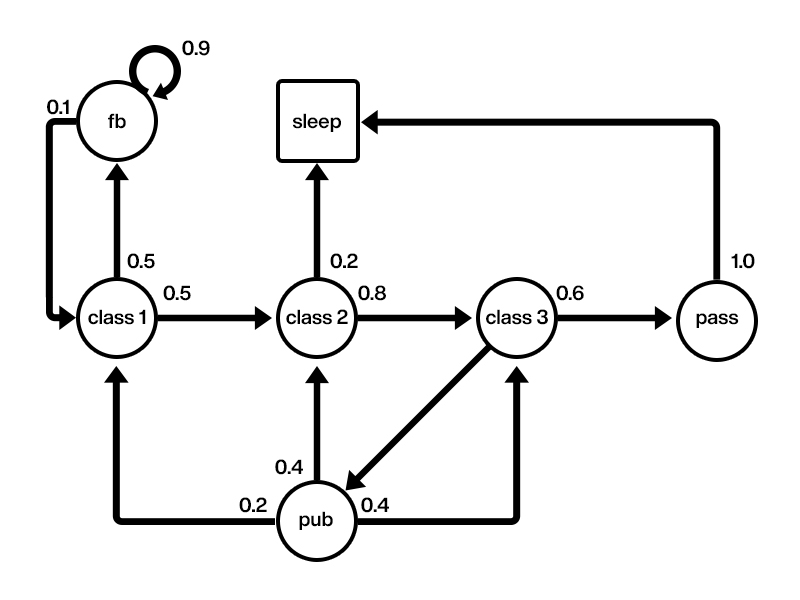

Image that we only three classes that we have to attend to and if we get through all of them we are done. If that would be that easy. We start from them <code>**class 1**</code> and there is <code>**50% probability**</code> to make it through next <code>**class 2**</code> there is as well 50% probability that we will go to look at facebook. If we at facebook and it's quite addictive there is <code>**90% probability**</code> that we kind of self transition to the same state and keep looking to the facebook. And after few iterations there is a <code>**10% probability**</code> that we will drop out of it and return to the class 1. And after a while we will make to the <code>**class 2**</code> unfortunately we are talking there about <code>**Markov processes**</code> and we feel a bit sleepy and so there is about <code>**20% probability**</code> that we fall asleep, but there is a <code>**80% probability**</code> to make it through to final class at which point we might tend to <code>**40% probability**</code> go to the pub. Which means if we go to the pub and drink few beers we might end up either regressing to the class 1 <code>**20% probability**</code> and we dont go to the pub there is <code>**60% probability**</code> that we will pass our final exam and then after that we can go to sleep. And this <code>**sleep state**</code> represent <code>**terminal state**</code> to the Markov process. A terminal state doesn't need any special machinery think of it as a <code>**self-loop**</code> and absorbing terminal state. 

Sample episodes for Student Markov Chain starting from S1 = C1

$$S_{1}, S_{2}, S_{T}$$

What it means to take samples of this. <code>**A sample is a sequance of states:**</code>

- C1 C2 C3 pass sleep
- C1 FB FB C1 C2 sleep
- C1 C2 C3 pub C2 C3 pass sleep
- C1 FB FB C1 C2 C3 pub C1 FB FB FB C1 C2 C3 pub C2 sleep

Each of these you can think of like a random sequance that are sampled from these dynamics. <code>**Thats what it means to have a random process**</code>. We get some random sequance thats drawned from the probability distribution over sequances of states. In fact because it has a Makrov property it means that it can be described by one of theses diagrams if you like. It can be described from any state that has some probabilty of transition to any other state. 

___________________________

We can look at the <code>**transition matrix**</code> with this problem. And it basically tells us that any of these states in which we might have been , what is the probability of transitioning to the any other of these states. If we would look at C2 state this row would tell us that there is 0.8 probability of transition to C3 and 0.2 chance transitioning to the sleep state.
And if we look to the all rows together that fully describes the entire dynamics of this system. And once we have this matrix we are able to sample repeatedly from this matrix and get our sample of sequance of states after this Markov process.

\begin{multline*}
P =
\begin{matrix}
      & C1  & C2  & C3  & pass & pub & fb  & sleep \\
C1    &     & 0.5 &     &      &     & 0.5 &       \\
C2    &     &     & 0.8 &      &     &     & 0.2   \\
C3    &     &     &     & 0.6  & 0.4 &     &       \\
pass  &     &     &     &      &     &     & 1.0   \\
pub   & 0.2 & 0.4 & 0.4 &      &     &     &       \\
fb    & 0.1 &     &     &      &     & 0.9 &       \\
sleep &     &     &     &      &     &     & 1.0   \\
\end{matrix}
\end{multline*}

<code>**How do we deal with modifications of these probabilities over time?:**</code>
 - Non stationary Markup process, in that case we can use the same kind of algorithms that we use in stationary case but incrementaly adjust your soliution algorithm just by tracking the best soliution that we found so far.
 - The fact that you got non stationary dynamics it just makes a more complicate Markov process it sort of augments current process but fundamentally doesn't change the structure of this being a Markov process. 

## Markov Reward Processes

So far we have not talked really about reinforcement learning. No rewards, no actions, so lets start putting some of that machinery in.

First and perhaps most important thing is to add <code>**rewards**</code>. We will create a Markov Reward process which you can thing of like a Markvo Process with value judgements saying how good it is to be in some particular state, how much reward will we accumulate across some particular sequance that we sampled from this Markov Process. 

<code>**A Markov reward process is a Markov chain with values.**</code>

<div class="alert alert-block alert-info">
<h2>Definition</h2>
    
<code>**A Markov Reward Process is a tuple ⟨S, P, R, 𝛾⟩**</code> 
 - <code>**S is a finite set of states**</code>
 - <code>**P is state transition probability matrix**</code> 
    
\begin{multline*}
P_{s \acute{s}} = \mathbb{P}[S_{t+1} = \acute{s} | S_{t} = s]
\end{multline*}

 - <code>**R**</code>  is a reward function

\begin{multline*}
R_{s} = \mathbb{E}[R_{t+1} |S_{t} = s]
\end{multline*}    
    
 - <code>**𝛾**</code>  is a discoint factor
    
\begin{multline*}
\gamma \in [0,1]
\end{multline*}    
    
</div>

Reward function is something that tells us if we start it any state <code>**s**</code> if we are in some state how much reward do we get from that state only and that moment. This is just the immediate reward and what we care about is maximizing acummulated sum of these rewards. Thats what we care about in RL. So if the Markov Reward process we start summing these things together over time.   But for now R just tells us the one step at that moment at <code>**time 𝑡**</code> in <code>**state s**</code>  in <code>**time 𝑡+1**</code> we will get this <code>**reward**</code>. It just tells us what will happen next.

### Example: Student MRP

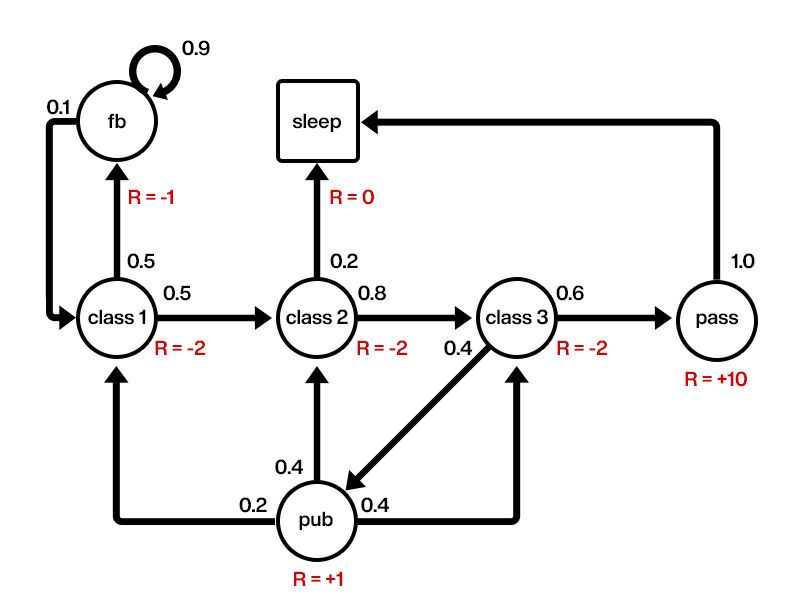

We will do to our <code>**Markov student process**</code> we will add some value judgements. Let say that we don't enjoy sitting in class so thats going to be <code>**-2**</code> and for each class. But if we pass in the end of course by get this big bonus <code>**+10**</code>. In Facebook we get <code>**-1**</code> per step. Brain gets drained of any sanity that we used to have. And going to the pub maybe drinks taste quite good so we get <code>**+1**</code>. But this arbitrary subjective values judgements that we throwed in to this.  

### Return

<div class="alert alert-block alert-info">
<h2>Definition</h2>
    
<code>**The return G𝑡 is the total discounted reward from time step 𝑡**</code> 
    
\begin{multline*}
G_{t} =  R_{t+1} + \gamma R_{t+2} + \gamma^{2} R_{t+3} + ... = \sum_{k=0}^{\infty} \gamma^{k} R_{t+k+1}
\end{multline*}

 - <code>**The discount 𝛾∈[0,1] is the present value of future rewards**</code> 
 - <code>**The value of receiving reward R after k + 1 time-steps is 𝛾^k R**</code>   
 - <code>**This values immediate reward above delayed reward.**</code>   
    - 𝛾 close to 0 leads to "myopic" evaluation
    - 𝛾 close to 1 leads to "far-sighted" evaluation
</div>

What we care about is the total reward across all chane here. We don't care about how much we get reward for being in one class. We care about the facts that if we follow through entire sequance we will get lets say -2, -2, -2, +10. And thats overall reward that we get for that sequance, that sample of the Markov reward process. So we can think of this <code>**G**</code> as the goal of reinforcement learning to maximize the entire return.

𝐺𝑡 is the reward sumed over all of the time steps <code>**infinitely**</code> into the future. And the way we control this return and make it <code>**finite**</code> is by using <code>**discount factor 𝛾**</code>. So we basically say we are going to discount by factor 𝛾 each time step going into the future. We get an immediate reward of R at R𝑡+1 and let say on next step our gama is 0.9 times the reward R at 𝑡+2. And the further on gama squared times R𝑡+3 and so on all the way to infinity. And thats our goal to maximize the sum of all of these rewards.
________________________________

<code>**Why there is no expectation ?**</code> 

Because we are talking about the random sample at the moment.<code>**G is random**</code>, is just one sample from our Markov reward process of the rewards that we get going through that sequance. Later we get into <code>**expectations**</code>, what we actually care about.
________________________________

<code>**Discount factor 𝛾**</code> has to be <code>**between 0 and 1**</code>. And it tells us if you like <code>**the present value of future rewards**</code>. It tells us how much we care now about rewards we will get in the future. If we are at time step 10 and we know that we will get reward at time step 20 then we should discount that in additional ten times. Its ten time step into the future so we are going to discount ten more times. <code>**0 means maximally short sighted**</code> like if have a discount factor of zero we basically we zero anything beyond our current time step and we look only into that first reward. And we have a <code>**discount factor of 1 thats maximally far sighted**</code>. When we care about all rewards going infinitely far into the future. And we assume that our Markov process has a property that eventually these things will all be finite that we get 0 as an absorbing terminal state at the end.

Specifically the value or receiving reward  <code>**k+1 time steps later**</code> is 𝛾^k R, we just keep discounting again and again. 

So why should we do this, its basically we somehow are introducing a judgement here. Which is that we <code>**prefer short term rewards**</code> to a delayed reward. We prefer reward now thant later. And the amount that we prefer of reward later is given by discount factor 𝛾. The closer it is to 0 the more we prefer reward now. And the closer it is to 1 the more indiferent we are to when those rewards arrive.

### Why discount

<code>**So why should it be so ? Why most Markov reward an decision processes are discounted**</code>

<code>**THE UNCERTAINTY ABOUT THE FUTURE !**</code> One reason to use discount factor is to basically represent the fact that we do not have a perfect model. Image that we are just building Markov process to model the environment. We think that we came up with some great plan we think know exactly how much reward we will get in the future but if we don't entirely trust our decisions and evaluations that we make we might choose to discount. Maybe we can take this part of gold now or maybe we should trust our plan and model that going to tell us that all these things are going to happen in next ten years and we will get even bigger part of gold. We then really have to trust this model to wait so much time steps and really believe that things are going to turn just as we have planned in order to get that reward later. Uncertainty is really one of the majors kind of intuite reasons to use discount.   

<code>**TO KEEP MATH BOUNDED**</code> its convenient mathematically to discount rewards. And this is the main reason we do it in MDP framework of RL. Most of the time math works out and its easy to teach easy to understand. 

<code>**AVOIDS INFINITE RETURNS**</code> Avoiding infinite retusn in cyclic Markov processes. If we cycle and get rewards again and again we need some mechanism to avoid this infinity. There are few mechanism to deal with this. 

<code>**INTEREST**</code> If the reward is financial immediate rewards may earn more interest thant delayed rewards. Money now is worth more than money later. 

<code>**NATURAL BEHAVIOUR**</code> Animal/human behaviour shows preference for immediate reward. Test are done to prove this. Human seems to have a <code>**hyperbolic**</code> not <code>**exponential**</code> discounting. This is a cognitive model in animals how biological desicion making operates. 

<code>**EXCEPTION**</code> It is sometimes possible to use undiscounted Markov reward processes (i.e 𝛾 = 1) e.g. if all sequences terminate. Like in the students MRP we know that all sequances end up where we at some point fall asleep one way or another. 

<code>**AVERAGE AWARD FORMULATION**</code> 

### Value function

Talking about <code>**Expectations**</code> this brings as at <code>**value function**</code>.Which is a really the central quantity which we are interested in RL<br> 
The value function <code>**v(s)**</code> gives the long-term value of state <code>**s**</code>

<div class="alert alert-block alert-info">
<h2>Definition</h2>
    
<code>**The state  value function v(s) of an MRP is the expected return starting from state s**</code> 
    
\begin{multline*}
v(s) = \mathbb{E}[ G_{t}  |  S_{t} = s]
\end{multline*}
    


If we are in this concrete state <code>**𝑠**</code> how much value will we get from there on. Whats total reward that we will get from that state onwards. So formally is just the expected return if you start in that state <code>**𝑠**</code>. If we drop you into this MRP and in some state, lets say C2 how much reward will you get from C2 to the end untill you terminate. Thats basically whats it is saying. And we have this <code>**𝔼**</code> expectation because the environmnet is <code>**stochastic**</code>, the evoliution of states might go one way in one episode and in a different way on another episode. What we care about is the expected return over all of those different episodes. And that the value, thats how good is to be in any given state. <code>**This is the central quantity, we prefer states that gives us more total reward.**</code>  

The formulation of our problem is to say lets firstly measure that. In MRP there is not concept of maximizing we just say lets just measure how much reward we get. When we get to MDP's we want to maximize this quantity. 

### Example student Markvo chain returns

Sample <code>**returns for student Markov chain:**</code><br>
Starting from S1 = C1 with 𝛾=0.5

\begin{multline*}
G_{1} =  R_{2} + \gamma R_{3} + ... + \gamma^{T-2} R_{T}
\end{multline*} 


    C1 C2 C3 Pass Sleep            | v1 = -2 - 2 * 0.5 - 2 * 0.25 + 10 * 0.125                   = -2.25
    C1 FB FB C1 C2 Sleep           | v1 = -2 - 1 * 0.5 - 1 * 0.25 -  2 * 0.125 - 2 * 0.0625      = -3.125
    C1 C2 C3 Pub C2 C3 Pass Sleep  | v1 = -2 - 2 * 0.5 - 2 * 0.25 +  1 * 0.125 - 2 * 0.0625 ...  = -3.41
    C1 FB FB C1 C2 C3 Pub C1 ...   | v1 = -2 - 1 * 0.5 - 1 * 0.25 -  2 * 0.125 - 2 * 0.0625 ...  = -3.20
    FB FB FB C1 C2 C3 Pub C2 Sleep | v1 =


We have different sample sequances through this Markov Reward Process and we look at the values of these samples. 
<code>**Whats the value of being in the start state ?**</code>. One way to estimate it is just take a bunch of samples and take the average of their values and that will be a legit estimate of the value function of that state. The returns are samples by random but the value function is not a random quantity , its a expectation over these random variables. 


### Example: State-Value Function for Student MRP

Lets consider couple a of discount factors 
 - Maximaly short sighted view <code>**v(s) for y = 0**</code>

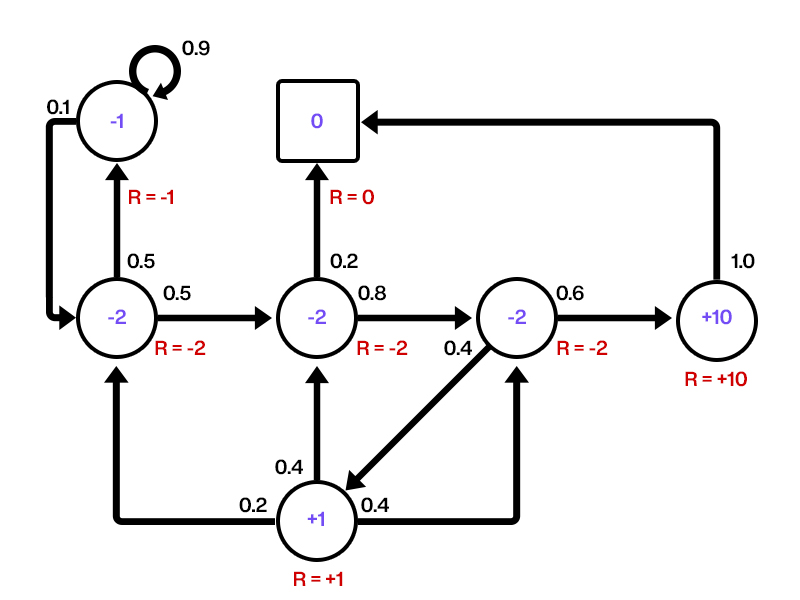

We dont care here about literally anything except one step of immediate reward. So if we take any given state here so now if we consider C2 state here we know that no matter what we do afterwards we will get the <code>**reward of -2**</code> at this time step it doesn't matter if we are going to get these other things like +10 later, its irrelevant. We just look how much reward we get in this time step onwards. <code>**So the value of being in C2 state is -2. If will go to sleep or to C3 we will get -2**</code>.

How ever if look at more long sighted view
 - More long sighted view <code>**v(s) for y = 0.9**</code>

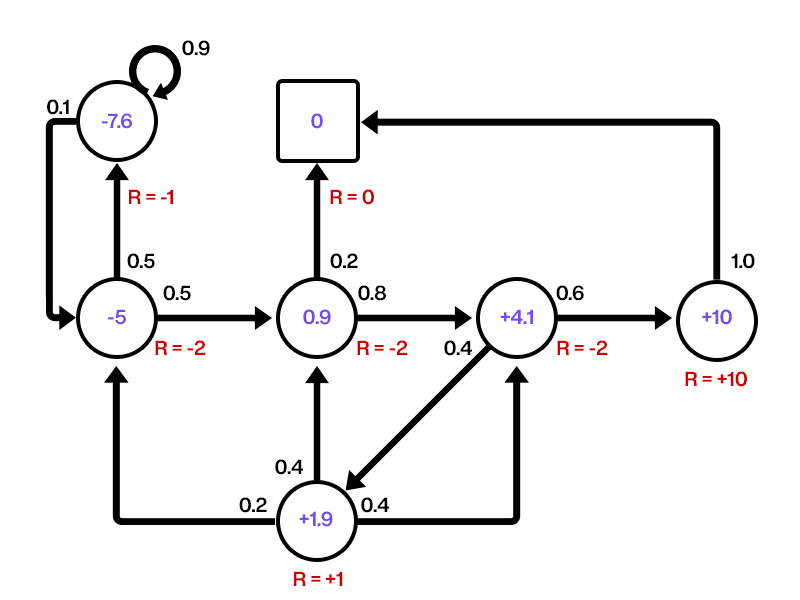

Then all values change and now we have to consider if we were in this C2 state although i will get reward of -2 but then with 0.8 probability we are going to transition to another state C3 overhere and in that situation we are going to get additional rewards and when we factor that all together and compute it (will be covered later). The value of state C1 becomes much beter we can get 0.9 reward from this state onwards. Kind of averaging over probability falling asleep and continuing through the classes. Thats the average now of expectation over all of the different paths that we can take through this system and <code>**that number kind of summerizes how good it is to be in that state**</code>. If drop you in that class, 0.9 - thats how good you are. 

## Bellman equation for MRPs


The value function can be decomposed into two parts:
 - immediate reward <code>**𝑅𝑡+1**</code>
 - discounted value of succssor state <code>**𝛾v(𝑆𝑡+1)**</code>

This is the most fundamental relationship in RL. You can come across this in <code>**dynamic programming**</code> as well.
Very widely used and its called<code>**Bellman Equation.**</code><br>

The idea that the value function is sort of based on  this recursive decomposition. It basically says that you can take your sequance of rewards from some time step all the way onwards and you can break it into two parts which basically consist of immediate reward that we are going to get and then the value that we will get from that time step onwards. <br>
<code>**immediate rewards + the value where you end up from the successor state**</code><br>

If lets say we are a robot we might get the immediate reward of +10  but then we end up in a new state and the question is how good it is to be in it. So the overall value function of being here before it like my 10 points to immediate reward plus the value of where I ended up. Thats what Belmman equation tells us. 

\begin{multline*}
v(s)
\end{multline*}

\begin{multline*}
= \mathbb{E}[G_{t} | S_{t} = s]
\end{multline*}

\begin{multline*}
= \mathbb{E}[R_{t+1} + \gamma R_{t+2} + \gamma^{2} R_{t+3} + ... | S_{t} = s] 
\end{multline*}

\begin{multline*}
= \mathbb{E}[R_{t+1} + \gamma(R_{t+2} + \gamma R_{t+3} + ... ) | S_{t} = s ]
\end{multline*}

\begin{multline*}
= \mathbb{E}[R_{t+1} + \gamma G_{t+1} | S_{t} = s]
\end{multline*}

\begin{multline*}
= \mathbb{E}[R_{t+1} + \gamma v(S_{t+1}) | S_{t} = s ]
\end{multline*}

Lets try to understand this <code>**Bellman equation**</code> a bit. <br>
<code>**The value function now v(s) is equal to expected 𝔼 immediate reward 𝑅𝑡+1 plus discounted reward of next state 𝛾𝑣(𝑆𝑡+1).**</code>

\begin{multline*}
v(s) = \mathbb{E}[R_{t+1} + \gamma v(S_{t+1}) | S_{t} = s)]
\end{multline*}

So value now, take a step, see what is the value in the state you end up and thats a like totalogical definition. If we got our value function correct it must obay to this identity. Thats what it means to have a value function.<code>**If we dont obey this identity we have not found the value function yet.**</code>

One way to understand this is by using what we call these <code>**backup diagrams**</code>. You can think of it like <code>**one-step look ahead search**</code>. We start in this state s and we can look ahead one step so this state s leads to a value functon v(s) if we go down to 𝑠́ (successor state) in one of the branches we will have another value function 𝑣(𝑠́) of successor state. And we will get some immediate reward along the way. This diagram show us that we can think of this as like one step look ahead tree where you start at this state you look ahead one step you integrate over probability of the each of these paths.

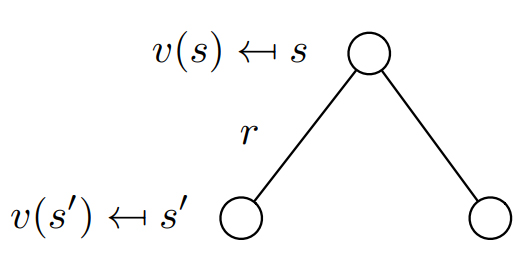

We averaging all the posible outcomes together and that gives the value function of this step. Thats the way how we will proceed when we will actually build algorithms when they will do this look ahead process.That why its usefull to have this backup diagrams in mind.

\begin{multline*}
v(s) = R_{s} + \gamma \sum_{\acute{s} \ \in \ S} \ P_{s\acute{s}} \ v(\acute{s})
\end{multline*}

<code>**4.3 = -2 + 0.6 * 10 + 0.4 * 0.8**</code>

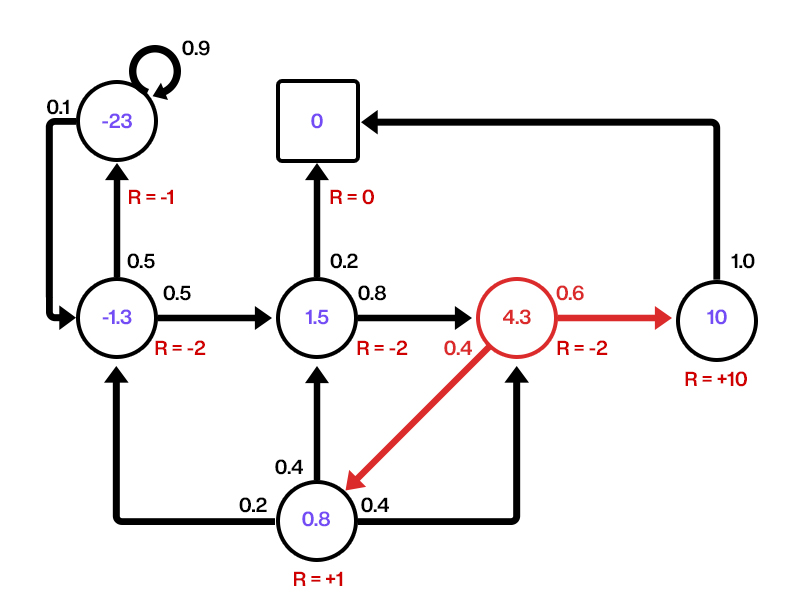

Lets pick out one state C3. Discount factor is 1 (undiscounted). We are looking at what happens when there is no discounting. We claim that this is the value function of this MDP. But how to verify it that ? With Bellman equation. If this value function is 4.3 then it should it really be equal to one step look ahead averaging all the things ahead that happen next then ending back here again. From that state there only two things that can happen. We get -2 no matter what happens and then with 0.6 prbability we could move to the next state and end up with the value of 10 but there is also 0.4 probability that you will go to the pub and end up with the value of 0.8. So if we sum those thing together which is 4.3. That validate the value of this MDP.   

 ### Bellman equation in Matrix Form
 
 The Bellman equation can be expressed concisely using matrices.
 
 \begin{multline*}
 v = R + \gamma Pv
 \end{multline*}
 
where v is a column vector with one entry per state

\begin{multline*}
\begin{bmatrix}
 v(1) \\
 . \\
 . \\
 . \\
 v(n)
\end{bmatrix}
= 
\begin{bmatrix}
R_{1} \\
 . \\
 . \\
 . \\
R_{n}
\end{bmatrix}
+ \gamma
\begin{bmatrix}
P_{11} & . & . & . & P_{1n} \\
.      &   &   &   &        \\
.      &   &   &   &        \\
.      &   &   &   &        \\
P_{n1} & . & . & . & P_{nn}
\end{bmatrix}
\begin{bmatrix}
 v(1) \\
 . \\
 . \\
 . \\
 v(n)
\end{bmatrix}
\end{multline*}

So far we have seen how to spell this out literally state by state but there is much more concise formulation which is using matrices and vectors. We have seen transition probability matrix and now lets introduce vector representation of value function which is the obvious thing. We form our column vector where each element of the column vector contains the value function of the specific state for all states. Now we can write our Bellman equation very concisely it just a value function that we start with and it the columns vector is equal to reward function (immediate reward) column vector representing how much reward we will get exiting specific state. And the next part is our transition probability matrix which tells us where we will transition to and the last column vector tells us with how much value we will end up. 

### Solving the Bellman Equation

 - The Bellman equation is a linear equation
 - It can be solved directly (it a nice thing about linear equations , except is not going to be true with MDPs). It good for evualing rewards but once we want to maximize rewards it gets harder. 
 - We can solve it directly assuming that our matrix is small enough to invert.
\begin{multline*}
 \ \ \ \ \ \ \ \ \ \ \ \   v = R + \gamma Pv
\end{multline*}

\begin{multline*}
(I - \gamma P) = R
\end{multline*}

\begin{multline*}
\ \ \ \ \ \ \ \ \ \ \ \ \ v = (I - \gamma P)^{-1} R
\end{multline*}

 - Computational complexity is O (n^3) for n states. Typically not practical method for large Markov processes.
 - Direct soliution only possible for small MRPs
 - There are many iterative methods for large MRPs , e.g
   - <code>**Dynamic programming**</code>
   - <code>**Monte-Carlo evaluation**</code>
   - <code>**Termporal-Difference learning**</code>

## Markov decision processes

Everything before was elementary building blocks leading to this process which is <code>**MDP**</code>. This is the actuall thing we use in Reinforcement Learning. 

A Markov decision process <code>**(MDP)**</code> is a Markov reward process with decisions. Its is a environment in which all states are Markov.

<div class="alert alert-block alert-info">
<h2>Definition</h2>
    
<code>**A Markov Reward Process is a tuple ⟨S, A, P, R, 𝛾⟩**</code> 
 - <code>**S is a finite set of states**</code>
 - <code>**A is a finite set of actions**</code>   
 - <code>**P is state transition probability matrix**</code> 
    
\begin{multline*}
P_{s \acute{s}}^{a} = \mathbb{P}[S_{t+1} = \acute{s} | S_{t} = s, A_{t} = a]
\end{multline*}
    
 - <code>**R**</code>  is a reward function

\begin{multline*}
R_{s}^{a} = \mathbb{E}[R_{t+1} |S_{t} = s, A_{t} = a]
\end{multline*}    
    
 - <code>**𝛾**</code>  is a discoint factor
    
\begin{multline*}
\gamma \in [0,1]
\end{multline*}    

The <code>**MDP**</code> we basically going to add another piece of complexity now which is <code>**actions**</code>. So far there was nothing to do for us. Agent was just plunked out in our student Markov reward process and we just randomly sampled those transitions and were spated out at the other end. We didn't get any <code>**agency**</code> we were not able to take actions and make decisions. So lets change that by introducing decisions. We will take our Markov reward process <code>**⟨S, P, R, 𝛾⟩**</code> and add one more component the <code>**actions space A.**</code> A is a finite set of actions in the extension class we will see how this can be made into continous or infite. But for now lets consider simple case the discrete set of actions, finite size.  <code>**Now our transition probability matrix depends on the action we take**</code>. So where you end up will depend on actions taken.  So the way how we thing about this is just one seperate matrix of transition probabilities for each action that you might take. Reward function might depend on action and may as well not. Apart from that everything else is the same. 

### Example: Student MDP

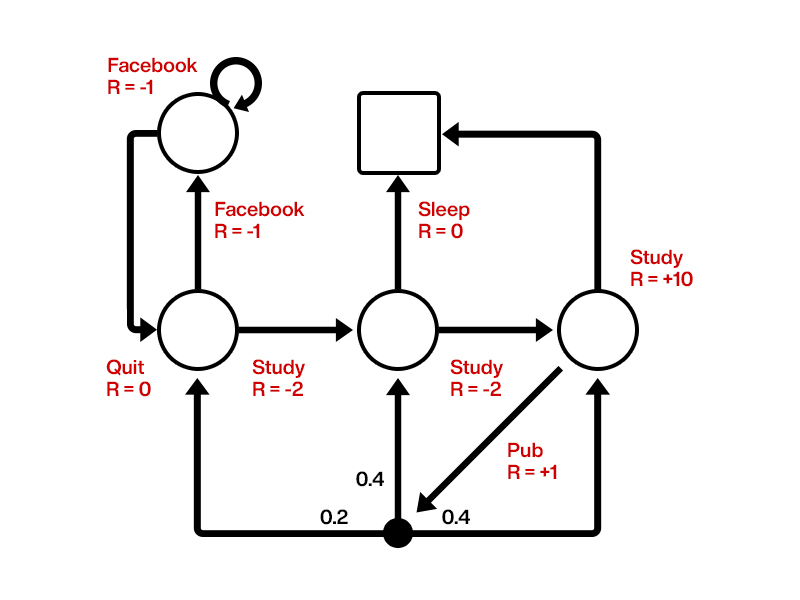

We have to redo our student Markov process now it has <code>**MDP**</code> decision that you can take , these red labels on the paths. Now we have some agency here and lets say from C1 state we can choose to <code>**study**</code> that a choice now. No probabilites attach to that. If we study we end up the C2 state. If we choose to go to <code>**facebook**</code> we end up another state. And there we can choose to do it <code>**again**</code> or choose to <code>**quit**</code>. We can choose to go <code>**sleep**</code> or <code>**study again**</code> or choose to <code>**go to the pub**</code>. I we choose to go to the pub, it is the only place that has some <code>**randomness**</code>. How knows what might happen there. There are some pobability that after few beers you end up in C1, C2 or C3. There a much more control that we can exert now over our path in MDP. This is the reality for agent.<code>**And the goal is to try and find the best path through our decision making process that maximizes the sum of rewards that we get.**</code> 

### Policies I

<div class="alert alert-block alert-info">
<h2>Definition</h2>
    
<code>**A policy π is a distribution over actions given states**</code>

<br>    
    
\begin{multline*}
\pi(a | s) = \mathbb{P}[A_{t} = a | S_{t} = s ]
\end{multline*}
    
<br>
    
 - <code>**A policy fully defines the behaviour of an agent**</code>
 - <code>**MDP policies depend on the current state (not the history)**</code>
 - <code>**Policies are stationary (time-independant)**</code>
    
    \begin{multline*}
    A_{t} \sim \pi(\cdot | S_{t}), \forall t > 0
    \end{multline*}

First thing we need to talk about is formalizing what it means to make and take decisions. To that we define so called <code>**policy**</code>. The policy is basically <code>**(stochastic policies)**</code> distributions over actions given states. If you are in some state <code>**𝑠**</code> this distirbution basically gives us the mapping. If I'm in this state, map from that state to some probability going left and some probability to going right. This is the thing that tells me if we are in C1 we are going to choose going to C2 with probability 0.9 and going to facebook with probability 0.1. This is under agents control and it a stochastic transition matrix. And it is usefull to make it stochastic because that allows us to do things like <code>**explorations**</code>. We will make us of that latter. 

Once we have a policy it completly defines how agent will behave. In MDP policies depend on just the current state we are in. Thats the <code>**Markov property**</code>. And as result we consider what we call <code>**stationary policies**</code>. The policies are the same no matter what time step we are in, in the MDP. We have the same policy each time step. And the only thing that it depends on is the state we are in not the time step at which it happend. And that sufficient to behave optimally because by definition where we have the <code>**Markov property**</code> and this state <code>**𝑠**</code> fully characterizes everything what will happen next. 

There are no <code>**rewards**</code> in this equation because state <code>**𝑠**</code> fully characterizes our future rewards. In a <code>**Markov reward process**</code> and <code>**Markov decision process**</code> the <code>**Markov propery**</code> means that <code>**𝑠**</code> fully characterizes the evoliution from this state onwards in the process. And what we are looking for is the policy which given the state we are in we want to pick actions that will get the most future reward. So everything we must look in is the what state we are in and what actions should we take next and we try to pick those actions in a way given that state that get us the most future reward. All rewards are in the future, we don't care about rewards in the past. So the current situation on how much we received reward is irrelevant.  

### Policies II

 - <code>**Given an MDP M = ⟨S, A, P, R, 𝛾⟩ and a policy 𝜋**</code>
 - <code>**The state sequance S1, S2 ... is a Markvo process ⟨S, P^𝜋 ⟩**</code>
 - <code>**The state and reward sequances S1, R2, S2 ... is a Makrov reward process ⟨S, P^𝜋, R^𝜋, 𝛾⟩**</code>
 - <code>**Where:**</code>
 <br>
  \begin{multline*}
  P_{s, \acute{s}}^{\pi} = \sum_{a \in A} \pi (a | s) \ P_{s, \acute{s}}^{a}
  \end{multline*}
 <br>
  \begin{multline*}
  R_{s}^{\pi} = \sum_{a \in A} \pi (a | s) \ R_{s}^{a}
  \end{multline*}

One import thing to know is the connection between Markov decision processes and Markov reward processes is that we can allways recover and MRP from our decision process. To understand that we can think about the sample of states that we draw like if we have some policy that helps us pick actions we just gonna draw the sequance of states and the sequance of states that we draw when we follow our particular process is actually a Markvo chain (process). No matter what policy we choose that policy defines some Markov chain that actually defines our dynamics that we gonna move throught system. Once we fix the policy and if you look at the sequance of states and rewards that we receive as we pass through that sequance is a Markov reward process. And the way to understand that is that we gonna define basically transition dynamics and reward function which just average over our policy. Which is gonna average over all the things which happend over our policy. We gonna define transition dynamics to be the average of transition dynamics of all of the things that we might do. Like if we gonna go left with probability 0.5 and right with probability 0.5 im just gonna take 0.5 times the dynamics of all the probabilities going to the state from there and plus 0.5 probability of all states that I will end up in here , sum those together and those average dynamics define some Markov reward process. So we can always flatten our MDP given our current policy back into a Markov chain. 

### Value function

<div class="alert alert-block alert-info">
<h2>Definition</h2>
    
<code>**The state-value function v_𝜋(s) of an MDP is the expected return starting from state s and then following policy 𝜋**</code>
    
<br>
    
\begin{multline*}
v_{\pi}(s) = \mathbb{E}_{\pi} [ G_{t} | S_{t} = s ]
\end{multline*}



<div class="alert alert-block alert-info">
<h2>Definition</h2>
    
<code>**The action-value function q_𝜋(s, a) is the expected return starting from state s, taking action a, and then following policy 𝜋**</code>
    
<br>
    
\begin{multline*}
q_{\pi}(s, a) = \mathbb{E}_{\pi} [ G_{t} | S_{t} = s, A_{t} = t ]
\end{multline*}

The concept of value function.<code>**We had a value function for Markov reward process but there was no agency**</code> there were no decision. Now we got this <code>**policy**</code> there is so way we can choose to behave in our Markov process. We migt be following this path straight through student Markov chain where we collect all the rewards by going through all the classes or we can choose to spend a lot of time on facebook. These are going to give different rewards the is no one expectation there are different expectations depending on how we behave. So we <code>**subscript our value function by the policy**</code> that we are interested in evaluating it. This tells us how good it is to be in state s if we are following policy 𝜋. So if we follow the policy that goes straight through class how much reward will we get. Or we follow the policy to stay on facebook as long as possbile how much we will get reward from each state onwards. We have this <code>**expectation now 𝔼𝜋**</code> which basically means the expectation when we sample all actions according to this policy 𝜋. We also going to define a second type of value  function called <code>**action-value**</code> function. So far we got a state value function , this v. That tells us how good is it to be in particulalr state s. Action-value function tells us how good is to take a particular action from a particular state. And this is the thing which we intuitively care about when we want to decide which action should we take. We are basically going to look at 𝑞𝜋, for a given policy for a given way to behave we want to know if im in this state s and we take this action a what is the expected return of total reward that we will get by taking that action how much reward will we get from that point onwards. That the key quantity that we are going to use help us optimize our MDP and pick the best actions. 

### Example : State - Value function for student MDP

Undiscounted γ =1 <br>

<code>**vπ(s) for π(a|s)=0.5, γ =1**</code>

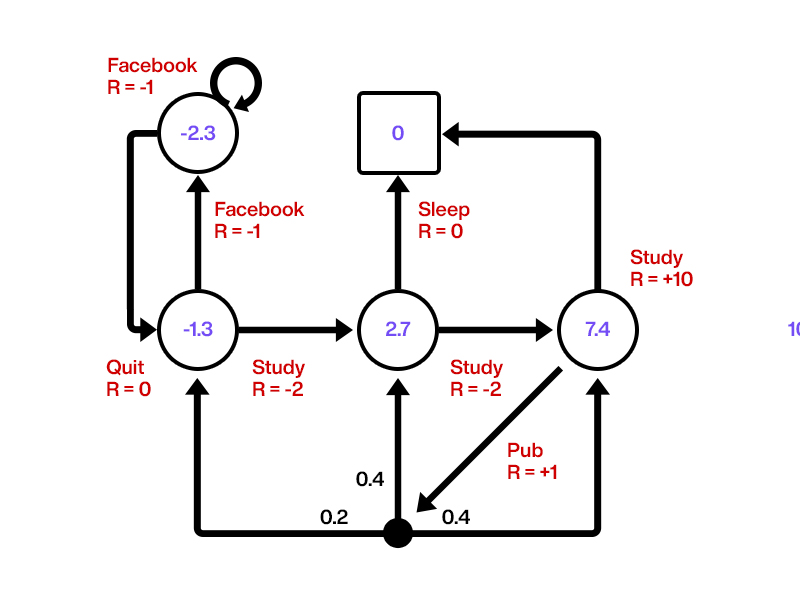

This MDP is undiscounted this is just for uniform random behaviour. Fixing the policy to say that always when we got a choice we are going always randomly pick 50/50 between those choices. This is the value function we end up with. We see that it is not very good to start in C1 state because there is a high probability ending in the facebook state. 

### Belmman expectation equation I

The state-value function can again be decomposed into immediate reward plus discounted value of successor state

\begin{multline*}
v_{\pi}(s) = \mathbb{E}_{\pi} [R_{t+1} + \gamma v_{\pi}(S_{t+1}) | S_{t} = s ]
\end{multline*}

The action-value function can similarly be decomposed

\begin{multline*}
q_{\pi}(s, a) = \mathbb{E}_{\pi}[R_{t+1} + \gamma q_{\pi}(S_{t+1}, A_{t+1}) | S_{t} = s, A_{t} = a ]
\end{multline*}

Now we can define another Bellman equation. We saw this equation in Markov reward process. Now we gonna define a <code>**Bellman equation for this value functions**</code> in the MDP case. Again we can use the same idea that the value function can be decomposed into immediate reward plus the discounted value of next state. Whereever you are we take one step and we get our immediate reward for that step and then we look at value of where we end up. And the sum of those things together tells us how good it was to be in our original state. Thats still true in MDP. Now what we are saying that we start in this state and we know that we are following policy 𝜋 but the value being in this state is still is immediate reward that we get plus the value of our successor state if we know that we are going to follow policy 𝜋 from there onwards. So we just look up what happens for one step of following the policy and we ask how much more reward we will get following that policy. And we sum those thing together and this gives us the Bellman equation. We can do the same thing with action value function. This basically tells us now if we are in one state and we take ant action from there and we will get some immediate reward from that specific action and then we will look up where we end up and ask what the action value of the state that we end up in under the action we pick from that point onwards.

### Bellman expectaion equation for V𝜋

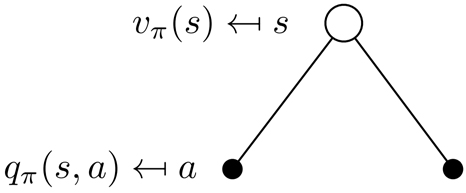

\begin{multline*}
v_{\pi}(s) = \sum_{a \ \in \ A} \pi(a | s)\ q_{\pi}(s, a)
\end{multline*}

The way to understand this is to understand how v and q relate to each other. If you are in the state value function here what we say that we are going to average over the actions that we might take. There is some probability that we will take actions toward black dots (white dots is state, black are actions). The probability of these actions is defined by our policy. For each of those actions that we might take there is an action value that tells us how good is to take that action from that state. We are doing one step look ahead and saying that state value how good it is to be in this state by look ahead one step look at the action values , average them together and that tells us the value of being in that state at top there.

### Bellman expectaion equation for Q𝜋

Lets do the converse to understand the opposite.

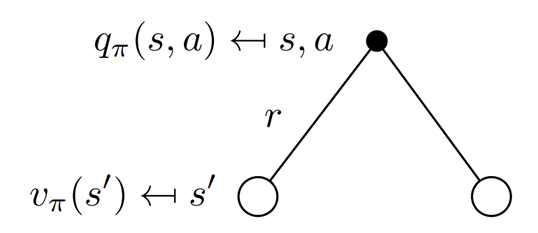

What happens if we start with some action, now the root of this tree is a state and we considering a specific action that we take from that state. We are in this particular state here and we considering how good is it to go right from that state. And how good it is we now have average over dynamics of our MDP. Environment might blow me ovehere or overthere. So after im going to right im might get into this different situations and we want to ask for each of these situations how good is it. What the value of being in that situation under my current policy , following my policy after that point. We average over all of those things using the probabilities of transition dynamics we average them toghether and that gives us the <code>**action value function**</code> at the root here. v tells us how good is it to be in particular state, q tells us how good is it to take a particular action from a given state. state-value and action-value function.

\begin{multline*}
q_{\pi}(s, a) = R_{s}^{a} + \gamma \sum_{\acute{s} \in S} \ P_{s\acute{s}}^{a} \  v_{\pi}(\acute{s})
\end{multline*}

### Bellman expectation equation for v𝜋 II

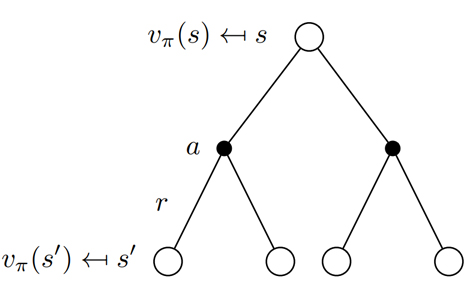

\begin{multline*}
v_{\pi}(s) = \sum_{a \ \in \ A} \ \pi(a | s)(R_{s}^{a} + \gamma \sum_{\acute{s} \ \in \ S} P_{s \acute{s}}^{a} \ v_{\pi}(\acute{s})) 
\end{multline*}

We can now stiching two figures together. Now we will get like a recursion that helps us understand v in terms of itself. And this how we end up solving Markov decision process. At the root of the tree we got the value function for the particular state tells us how good to be in this state. And we going to do a two step look ahead. We can consider all the actions to take next. Go left, go right. We can consider all the thing what environmnet might do to us. And each of those things that environment might do there is some successor state that we end up in. We want to know how good is it in that state and carry on with our usual policy. How much reward will we get if carry on from that point. Now when we average all these things together, basically we averaging in two ways, we are averaging over our policy we are weighting each of these archs by probability that our policy will select. We are averaging others archs by the transition probabilities that we will end up blowned in one or another direction. We average all together and that gives us the value of being in the root of this tree. How good is to be in particulal state.  

### Bellman expectation equation for qπ II

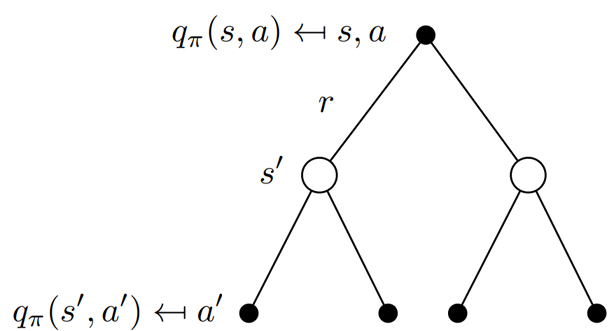

We can do exactly the same thing for action values the is recursive relationship. Just stiching diagram together the other way around we end up with exactly the same idea. Starting from particulal state and action we can now look ahead two steps consider where might the wind blow us first now. And then consider from the state that wind might blows us into which action might we take next. Left or right. And now we average over all these things again we look at the value of that particular action (the q value), average all these thing together and it tells us something about this q value at the start. So the q values relate to q values of the next step. As in the values case we have these two recursive relationship explaining how the value function relates to the itself in the next step. 

\begin{multline*}
q_{\pi}(s,a) = R_{s}^{a} + \gamma  \sum_{\acute{s}\ \in \ S} P_{s \acute{s}}^{a} \ \sum_{\acute{a} \ \in \ A} \pi(\acute{a} | \acute{s}) \ q_{\pi}(\acute{s}, \acute{a})
\end{multline*}

Beneath the math what is says is that value function at current time step is equal to the immediate reward plus the value function of where you end up. Thats all. 

### Example: Bellman expectation equation in student MDP

<code>**7.4 = 0.5 * (1 + 0.2 * -1.3 + 0.4 * 2.7 + 0.4 * 7.4) + 0.5 * 10**</code>

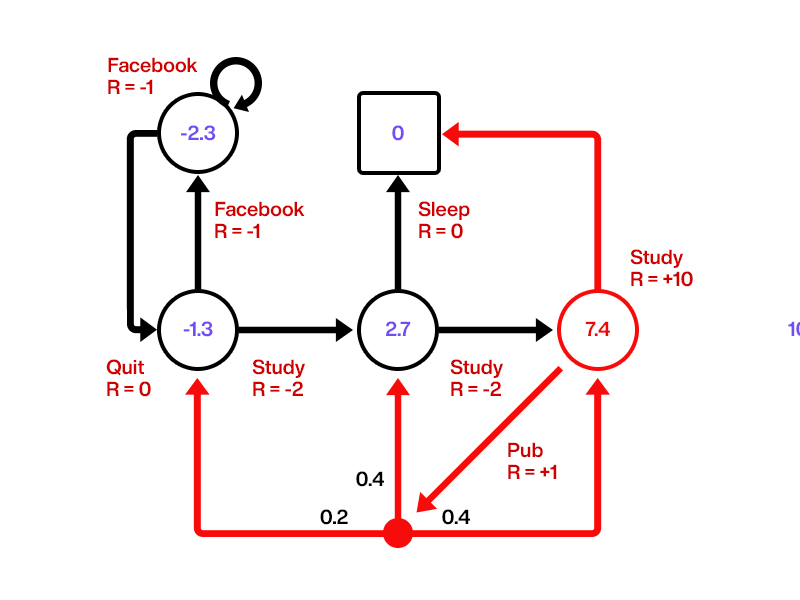

In our student MDP we are going to consider <code>**one state C3 v(s) = (7.4).**</code> We are going to use Bellman equation to verify that this state indeed has the value of 7.4 and how can we verifiy it ? We can do our look ahead for our state value function here. This state value is equal to all the things that we might do from there. We are doing things here with 50/50 probability. 0.5 chance we study and 0.5 chance we go to the pub. So under that policy where we make all our decision based on 50/50 we start in this state <code>**C3**</code> there is 0.5 chance we will take this upper arch and get +10 reward. There is also 0.5 chance we end up in the pub. And the pub might take us with 0.2 probability to C1 , with 0.4 to C2 and with 0.4 back to C3. And in each of these cases we end up different state with a different value. So we sum up those things together. We are summing together this look ahead of what might happen after one step of taking actions and one step where we end up. And when we add all this together we get 7.4. We can verifiy that these numbers are self consistent for this one state. We can verify all of the other states and we will discover that this Bellman equation does indeed hold. And these number do represent the value function for this MDP.

So we now know how good is it to be each of these state. We will really get 7.4 units of reward in expectation if we just behave accroding to this policy. But that does not tell us <code>**the best way to behave**</code>

### Bellman expectation equation (Matrix form)

The Bellman expectation equation can be expressed concisel using the induced MRP

\begin{multline*}
V_{\pi} = R^{\pi} + \gamma P^{\pi} v_{\pi}
\end{multline*}

with direct soliution

\begin{multline*}
v_{\pi} = (I - \gamma P^{\pi})^{-1} R^{\pi}
\end{multline*}

This idea that we can flatten any MDP back to Markov reward process. By defining average state transition dynamics 𝑃𝜋 and average reward function 𝑅𝜋 and ofcourse when we average those things. That give us the Markov reward process we know how to solve those things already. Bellman equations gives us a description of the system that we can solve. Once solved it tells us what the value function exactly is. One linear equation and we are done.

### Optimal value function

We dont care about how much reward we will get following this 50/50 policy in student Markov chain. What we care is to find the best path through the system.
So the essential problem we care about is finding optimal the best behaviour in MDP. 

<div class="alert alert-block alert-info">
<h2>Definition</h2>
    
<code>**The optimal state-value function v*(s) is the maximum value function over all policies**</code>
<br>
    
\begin{multline*}
v_{*}(s) = \max_{\pi} v_{\pi}(s)
\end{multline*}
<br>    
       
<code>**The optimal action-value function q*(s,a) is the maximum action value function over all policies**</code>
<br>
    
\begin{multline*}
q_{*}(s, a) = \max_{\pi} q_{\pi}(s, a)
\end{multline*}
        

 - <code>**The optimal value function specifies the best possible performance in the MDP**</code>
 - <code>**An MDP is "solved" when we know the optimal value fn**</code>

#### Optimal state-value function
Lets define what really means to find a way to solve our problem optimally. Starting with value functions <code>**𝑣∗**</code> is the maximum value function over all policies. What we are saying is all kind of different polilicies we could follow in our Markov chain but what we care about is the best of those. We care about to understand whats the maximum posibile amount of reward that we can extract from this system. The is always different ways we can traverse the system, each different policies will lead to a different evoliution, stochastic evoliution. We care which of those is going to lead us to the most reward in expectation. <code>**𝑣∗**</code> tells us not what was the best policy but whats the maximum possible reward we can extract from the system. 

 #### Optimal action-value function
 
 70milarly action value function <code>**𝑞∗**</code> tells us the maximum amount reward we can extract starting at state <code>**𝑠**</code> and taking action <code>**𝑎**</code>. So given actually that you commit to a particular action whats the most possible reward you can get from that point onwards. Start in some state you know your action lets say left so whats the maximum possible reward after you moved left. And whats really important about this is that if you know <code>**𝑞∗**</code> then we are basically <code>**done**</code>! If we want to know optimal way to behave in our MDP, what would we do. Well if someone told us the maximum possible amount of reward we can get overall policies given every action we might take. So this is basically telling us under all different ways we can behave if we go left we might get 70 units of reward but under all different policies if we go right we can get 80 units of reward. Well what then we do ? Which way to go, ofcourse we go right and we 80 rathern then 70 units. This immediately tells us the right action to take. If we have <code>**𝑞∗**</code>  we are kind of done we can declare a victory. <code>**We got the quantities necessary to behave optimally in our MDP**</code>. Informally we can say that MPD is solved when we know this optimal value function. Solving MDP you can think of this as finding <code>**𝑞∗**</code> 

### Example: Optimal value function for student MDP

<code>**𝑣∗(s) for 𝛾 = 1**</code>

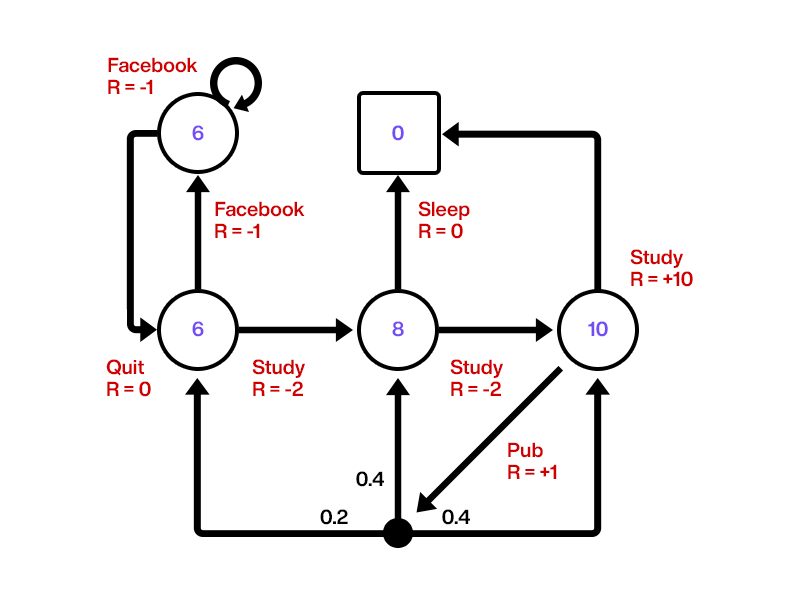

Lets take a look what is <code>**optimal value function**</code> here. We are looking into <code>**undiscounted 𝛾 = 1**</code> case just to keep numbers simple. In this case its fairly intuitive we can kind of work this out by eyeballing it. If we are in C3 state , should we go to the pub or should we study. If we study we get this +10 reward and go to sleep. And that turns out the optimal value. If we are in C2 state, we can either go to sleep and get reward of 0 along the way or we can study and end up in this state with the value of 10 and get -2 along the way. So the value of being in C2 is 8. If we back up one state again into C1 we can see the value of being in this state is 6 because after reward of -2 we end up in this state with value of 8. This is actually the optimal value we can get, this is <code>**𝑣∗**</code> in this MDP it tells us how good is to be in each of these states. And that tells us the most possible reward we can extract from this MDP. 

### Example Optimal action value function for student MDP

<code>**Yet it doesn't tell us how to behave in it**</code>.To do that there is two things we can do one is define <code>**𝑞∗**</code>. 

<code>**𝑞∗(s,a) for γ =1**</code>

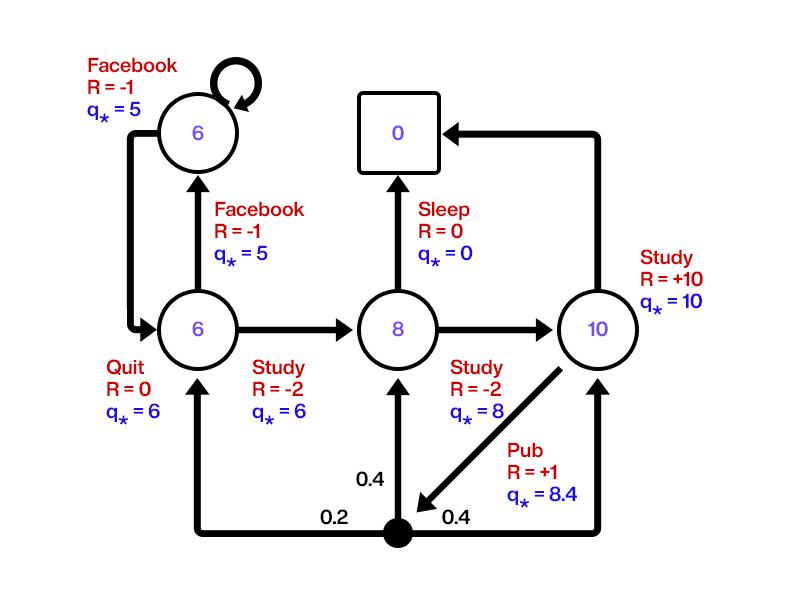

In order to figure out whats the best action to take we look at our <code>**action value function**</code>. And this function now is labeling this path archs with whats the value of each arch. Saying what is the optimal value of each arch. So we know for example that C3 -> sleep arch optimal value is 10. The C2 -> C3 arch we know that we get -2 for taking that arch and we gona end up the state where we get 10 units of reward. So the value of this arch is 8. The value of C2 -> sleep arch is 0. So now we are able to make decisions. We can choose to take the optimal decision from there and it will tell you to pick 8 above 0 and we will chose to take C2 -> C3 arch. The arch C3 -> pub value is 8.4 but once we got this value we can say that this arch is basically averaging over all things which might happen next. Looking at value of 6, 8, 10 and weighting then and now we can choose between states that gives us the reward of 10 units going onwards or should we go to the pub and get this +1 reward now and still have a chance to get our 10 units. We have to weight them up and depends on discount factor and all these other things. But in this case we see that this arch C3 -> sleep has the value of 10 and the C3 -> pub has the value of 8.4 so it turn out not recommended to go to the pub. 

<code>**READING:<br>
Dynamic Programming and Optimal Control, Vol. II, 4th Edition: Approximate Dynamic Programming 4th Edition
by Dimitri P. Bertsekas**</code>

### Optimal Policy

We talked about optimal value function but what we really about is <code>**optimal policy**</code>. The best possible way to behave in the MDP. <code>**We talked about policies that is just a stochastic mapping from states to actions that we take**</code>. And now we want to understand which one is the best of those things. So far we talked how much can we extract reward from the system. Yet we have not talked about the policy itself. 

To understand what it means to be optimal we need to find a notio of optimality. And to do that we need to know what it means for one policy to be better then another policy. So what we do is actually we define just a define a partial ordering over policies

\begin{multline*}
\pi \geq \acute{\pi} \ \text{if} \ v_{\pi}(s) \geq v_{\acute{\pi}}(s), \forall s
\end{multline*} 

<code>**Lets consider 𝜋 and 𝜋́ , these are two arbitrary policies. And we define this greater or equal to operator this is going to be some partial ordering for policy space. It basically tells us an intuitive thing. One policy is better then another policy if the value function for that policy is greater than value function for the other policy in all states.**</code>

This means that it can't be worse. It is not possible to say policy is better than other policy if it is actually worse than that policy in one state has to be at least as good as in all states for us to say that it is greate or equal in partial ordering.  

Then there is very important theory in MDPs that <code>**is true for any MDP**</code>. It tells us that:

<div class="alert alert-block alert-info">
<h2>Definition</h2>
    
<code>**For any Markov Decision Process**</code><br>
    - <code>**There exist an optimal policy 𝜋* that is better than or equal to all other policies**</code>
    \begin{multline*}
    \pi_{*} \geq \pi, \forall \pi
    \end{multline*}<br>
    - <code>**All optimal policies achieve the optimal value function**</code>
    <br>
    \begin{multline*}
    v_{\pi_{*}}(s) = v_{*}(s)
    \end{multline*}<br>
    - <code>**All optimal policies achieve the optimal action-value function**</code>
    <br>
    \begin{multline*}
    q_{\pi_{*}}(s, a) = q_{s}(s,a)
    \end{multline*}

### Finding an Optimal Policy

An optimal policy can be found by <code>**maximising over 𝑞𝜋∗(𝑠,𝑎)**</code>

\begin{multline*}
\pi_{*}(a \ | s) = 
\{
\begin{array}{lcl}
1  \ \text{if} \ a = \text{argmax} \  q_{*}(s, \ a) \\
0 \ \text{otherwise}
\end{array}
\end{multline*}

<code>**This is always a deterministic optimal policy for any MDP**</code>

All we need is when we solve <code>**𝑞∗**</code> and we pick the action that gives us the most 𝑞∗. So in every state we pick action <code>**a**</code> with probability 1 that maximize <code>**𝑞∗**</code>. And that the action that will give us the maximu possible reward. This gives us one deterministic optimal policy 

<code>**If we know 𝑞∗(s,a), we immediately have the optimal policy**</code>

### Example: Optimal Policy for student MDP

<code>**𝜋∗(𝑎 |𝑠) for γ =1**</code>

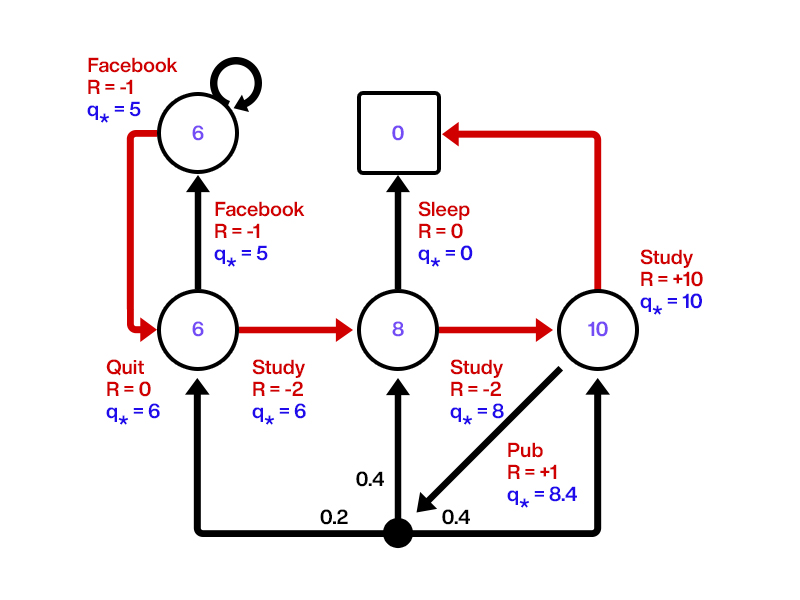

Now we are looking at optimal policy. Remember these archs representing the actions that we can take, like study, go facebook, go to pub and etc. And these red archs are highlighting the <code>**optimal policy 𝜋∗**</code>. And we can see that this must be the case by looking at <code>**𝑞∗**</code> values. The optimal policy is the one that picks with the highest q. So the red arch (optimal policy) is the one that maximizes us the reward going into the future.

### Bellman optimality equation for 𝑣∗

The optimal value functions are recursively related by the Bellman optimality equations:

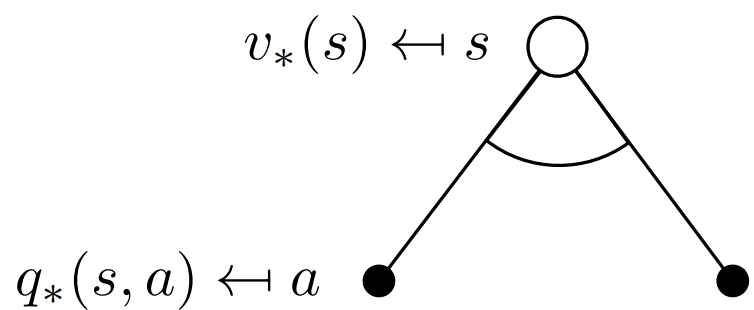

\begin{multline*}
v_{*}(s) = \max_{a} \ q_{*}(s, a)
\end{multline*}

So how do we are at this 𝑞∗ in practice. How do we figure out this values. These values are essential quantity which we are trying to figure it out that we could be the right action without even any look ahead. Well its done by working backwards with Bellman equations. Before we looked at the Bellman equation for expectations in MDP. It tells us how to really solve our MDP. It tells us how do we relate the optimal value function to itself. Before we looked at the Bellman equation in expectations which told us how <code>**𝑣𝜋**</code> are related to itself. We looked into this under average behaviour policy where you might go right or left with equal probability and how do the values relate to themselves. Now we are looking into the <code>**optimal values**</code> and how does it relate to itself.  And we can do a one step look ahead again. We ask what the optimal value in being in one state and we can consider each of the actions we might take and it will take us to these chance nodes , one of these action nodes. And we can say when we reach that action we can look at the action value. Both numbers are evaluated and now instead of taking average of these guys we take the max. Basically take a look at each action value ant pick the max of them. And thats is going to tell us how good is to be in this state. <code>**Simply the max of all q values**</code>

### Bellman optimality equation for Q∗

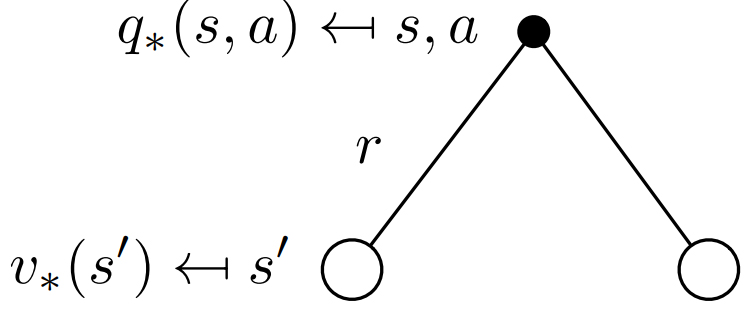

Now we are going to do the other half. We had v ➜ q, now we are going to do q ➜ v. So now we want to know how good is our one of those red archs in diagram. How do we know the optimal value for being in particular state and taking particular action. How do we know that some arch has particular optimal value to it. Again we can do one step look ahead ,but now we are looking ahead what environment dynamics might do to us. We don't control this. This is like going into pub and then you know nobody knows what might happen in there and we might end up in all of these crazy situations. Each of these states we end up in has some optimal value. Its like an inductive argument we assume that we know inductively the otpimal value of each of these states that we might end up in. And if we know the value of each of those states we might end up in, we just need to average over them now. There is no max here, we don't get to pick where the wind blows us. We have to average over all things the environment might do with us. And that tells us how good is our action. So our optimal action value is the immediate reward plus the average of all the probabilities that wind will blow us left, right multiplied by the optimal value of being in that state. 

\begin{multline*}
q_{*}(s,a) = R_{s}^{a} + \gamma \sum_{\acute{s} \ \in \ S} \ P_{s \acute{s}}^{a} \ v_{*}(\acute{s})
\end{multline*}

### Bellman Optimality Equation for V∗ (2)

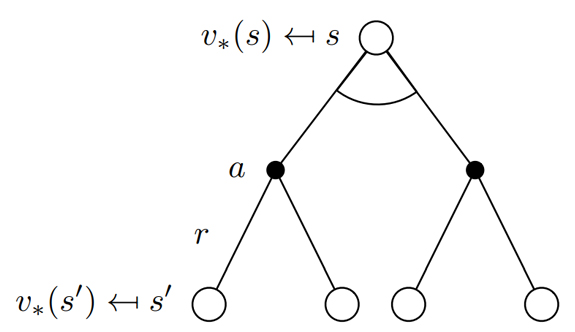

And again what can we do is to put those two pieces together and when its done we have a <code>**recursive relationship**</code> that relates <code>**𝑣∗**</code> to itself. This gives us an equation that we can solve. This is now two step look ahead 
over the actions we can take and maximizing over those and we are also looking ahead over the "dice" the environment can throw and we dont maximize over that because we do not control that instead we average over the "dice". We do two step look ahead over our actions from particular state and all of the things the environment might do to us. And we look at the optimal value we end up we back these things all way up and that tells us how good is it to be in this state. Thats the Bellman optimality equation of 𝑣∗.

\begin{multline*}
v_{*}(s) = \max_{a} \ R_{s}^{a} + \ \gamma \ \sum_{\acute{s} \ \in S} \ P_{s\acute{s}}^{a} \ v_{*}(\acute{s})
\end{multline*}

### Bellman Optimality Equation for Q∗ (2)

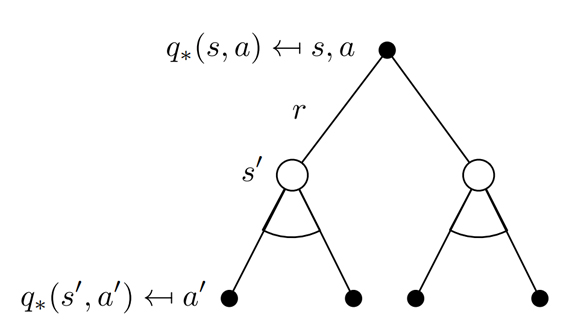

We can do the same thing by flipping diagram around. Starting with the action values. This is how we arrive to the recursive relationship between 𝑞∗ values among themselves. So this is not saying anything different then previous equation. It just like a reordering of same idea. And this reordering tells us that if we start and we want to know how good is one of these archs , how is it good to be in a particular state and take a particular action. Now first of all we consider where the wind will blow us we average over "dice" that environment roles. And wherever it rolls we get to make a decision. We decide what action to pick after wind blows us and we get to maximize over decisions we take. We average over "dice" we maximize over decisions we take and for each of these leaves we consider the optimal action value. How good is it to be in this state taking particular action. We back all the way up to the beginning ant that tells us the 𝑞∗ value of the root of this diagram.

\begin{multline*}
q_{*}(s, a) = R_{s}^{a} + \ \gamma \ \sum_{\acute{s} \ \in S} \ P_{s\acute{s}}^{a} \ \max_{\acute{a}} q_{*}(\acute{s}, \acute{a})
\end{multline*}

### Example : Bellman Optimality equation in student MDP

<code>**6 = max {-2 + 8, -1 + 6}**</code>

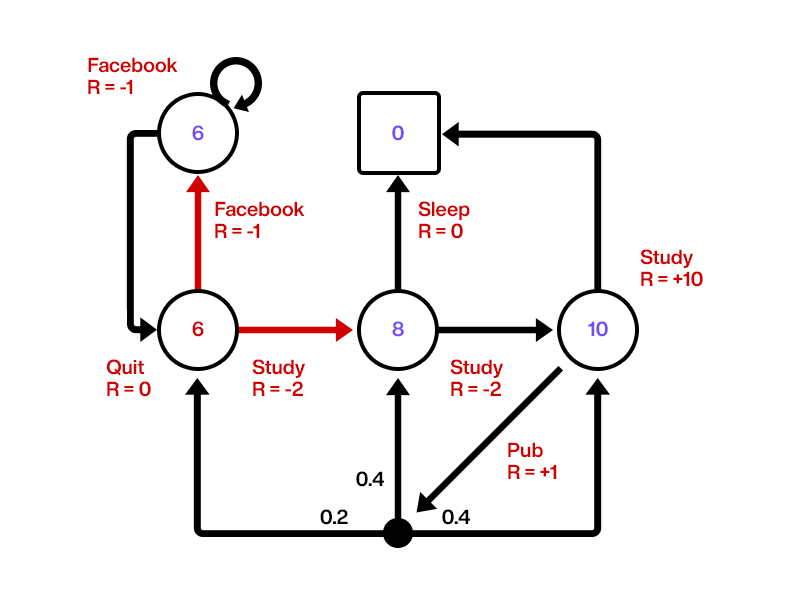

Starting in C1 state we consider that we can take two possible actions (study, facebook). This one is straight forward, there is no noise in environment, we don't consider any dice rolls. Environment always rolls the same way ant takes us to next state on taken action. So we just look ahead one step, by saying the value 𝑣∗ of C1 state 6 is equal to the max over all the things we can do here of the value function where we end up. So we inductively know that if these other optimal values are correct and we maximize over all of the things that we can do we see that going in one way we get -1 + 6 (value of arch 5) and we can go the other arch -2 +8 (arch value 6) and we choose to go this way and our value function equal to 6.

### Solving the Bellman Optimality equation

Previously we saw that we had these Bellman equations with expectations that we just could solve by doing matrix inversion. Thats very appealing and quite easy to do with matlab, numpy other tools. Just type in our matrix , type in our vector representing the rewards , do matrix inversion and we are done. Unfortunately that doesnt work for Bellman optimality equation because we have non-linear equations now

 - <code>**Bellman optimality equation is non-linear**</code>
 - <code>**No closed form soliution (in general)**</code>
 - <code>**Many interative soliution methods:**</code>
   - Value iteration
   - Policy iteration
   - Q-learning
   - Sarsa

We got a <code>**max**</code> in addition to our expectation and we want to solve for this equation that relates to <code>**𝑣∗**</code> to itself or <code>**𝑞∗**</code> to itself with the max over these expectations. There is no closed form to this thing. So we have to be smarter and use iterative soliutions. Which best knowed example are value iteration, policiy iteration and q-learning. These are <code>**dynamic programming**</code> methods for iteratively solving these recursive equations. 

## Extensions to MDPs

 - <code>**Infinite and continuous MDPs**</code>
 - <code>**Partially observable MDPs**</code> 
 - <code>**Undiscounted, average reward MDPs**</code> 

### Infinite MDPs

### POMDPs

### Belief States

### Reductions of POMDPs

### Ergodic Markov Process

### Ergodic MDP

### Average Reward Value Function